In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
# Dataset directory
train_dir = r"C:\Users\afiqf\Desktop\deep-learning\Dataset\Train"
val_dir = r"C:\Users\afiqf\Desktop\deep-learning\Dataset\Valid"
test_dir = r"C:\Users\afiqf\Desktop\deep-learning\Dataset\Test"

# Model parameters
num_classes = 4  # Specify the number of classes in your dataset
input_shape = (224, 224, 3)  # Input shape expected by MobileNetV3


# Training parameters
batch_size = 32
epochs = 5
learning_rate = 0.001

In [12]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [13]:
# Load pre-trained MobileNetV3-Large model
base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification (adjust units based on your number of classes)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
import tensorflow as tf

# Print GPU devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPU devices:", physical_devices)


Available GPU devices: []


Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9432
Epoch 1: val_accuracy improved from -inf to 0.98500, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 48s 516ms/step - loss: 0.1558 - accuracy: 0.9432 - val_loss: 0.0389 - val_accuracy: 0.9850
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9754
Epoch 2: val_accuracy did not improve from 0.98500
88/88 [==============================] - 31s 348ms/step - loss: 0.0670 - accuracy: 0.9754 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9786
Epoch 3: val_accuracy improved from 0.98500 to 0.99000, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 31s 354ms/step - loss: 0.0741 - a

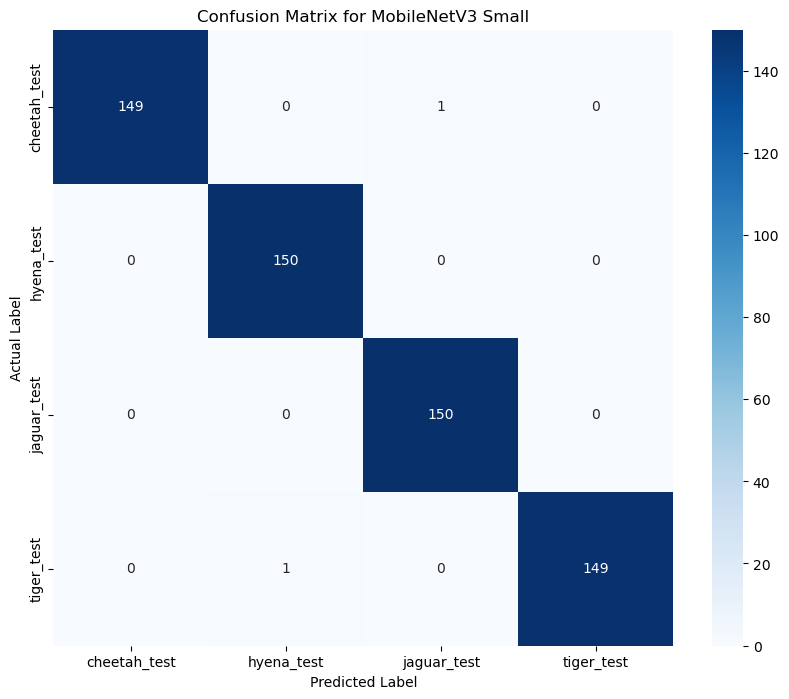

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      1.00       150
  hyena_test       0.99      1.00      1.00       150
 jaguar_test       0.99      1.00      1.00       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = r'C:\Users\afiqf\Desktop\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

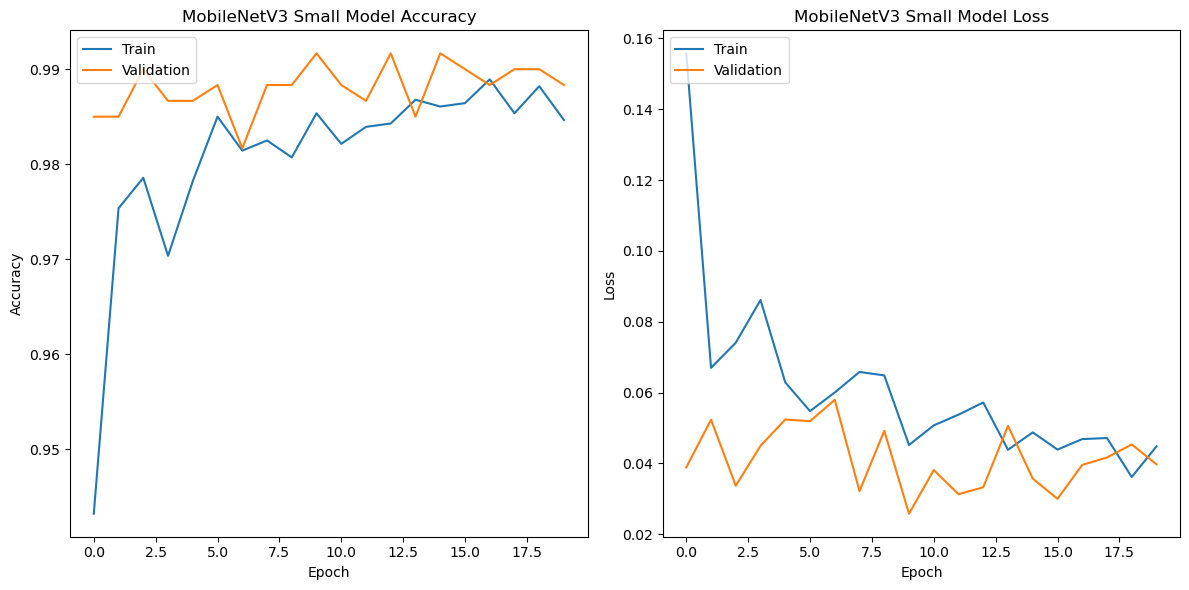

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 0.8031 - accuracy: 0.9318
Epoch 1: val_accuracy improved from -inf to 0.98833, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 37s 394ms/step - loss: 0.8031 - accuracy: 0.9318 - val_loss: 0.5362 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.5199 - accuracy: 0.9704
Epoch 2: val_accuracy did not improve from 0.98833
88/88 [==============================] - 34s 381ms/step - loss: 0.5199 - accuracy: 0.9704 - val_loss: 0.4260 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.9821
Epoch 3: val_accuracy did not improve from 0.98833
88/88 [==============================] - 34s 384ms/step - loss: 0.3796 - accuracy: 0.9821 - val_loss:

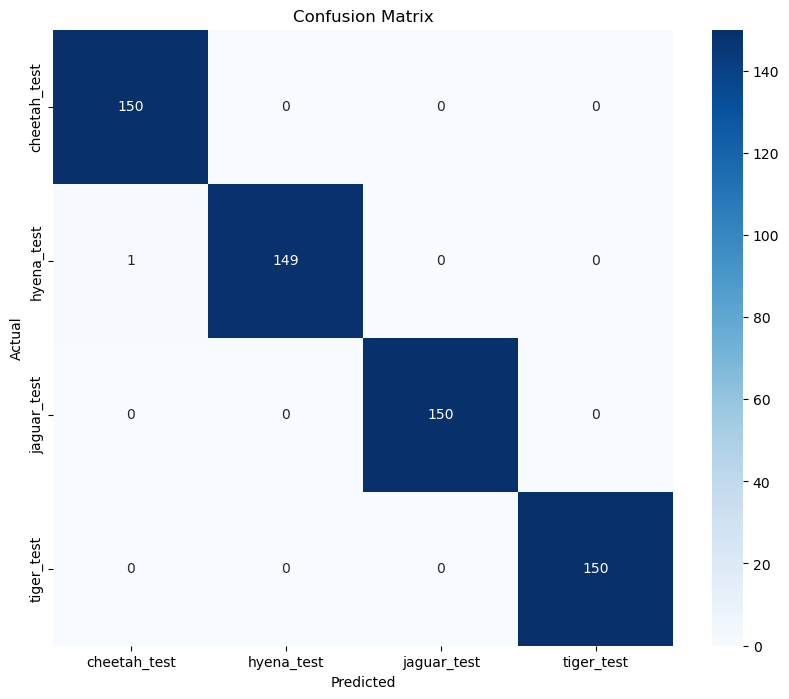

Classification Report:

              precision    recall  f1-score   support

cheetah_test       0.99      1.00      1.00       150
  hyena_test       1.00      0.99      1.00       150
 jaguar_test       1.00      1.00      1.00       150
  tiger_test       1.00      1.00      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



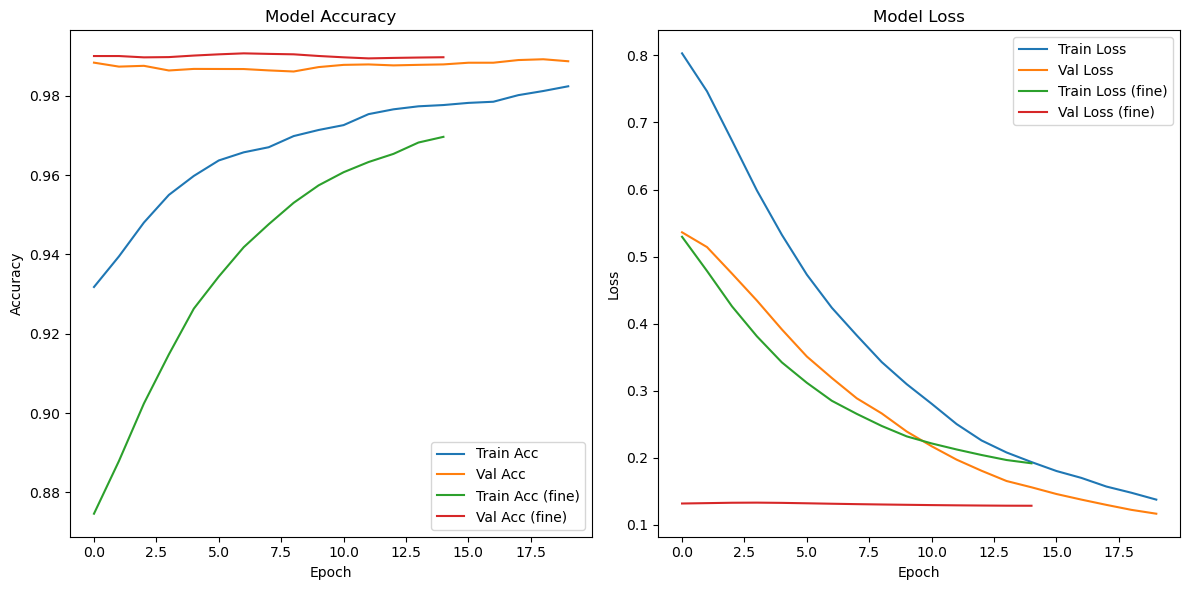

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
img_height, img_width = 224, 224
batch_size = 32
epochs = 100

# Dataset directories
base_dir = r'C:\Users\afiqf\Desktop\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load base model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base initially

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile (initial phase)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Train Phase 1: Freeze base
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Re-compile for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Phase 2: Fine-tune
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# Load best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Evaluation on test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ mAP: {mean_ap:.4f}\n")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Smoothed training curves
def smooth_curve(points, factor=0.8):
    smoothed = []
    for p in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + p * (1 - factor))
        else:
            smoothed.append(p)
    return smoothed

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(smooth_curve(history.history['accuracy']), label='Train Acc')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Val Acc')
if 'accuracy' in history_fine.history:
    plt.plot(smooth_curve(history_fine.history['accuracy']), label='Train Acc (fine)')
    plt.plot(smooth_curve(history_fine.history['val_accuracy']), label='Val Acc (fine)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(smooth_curve(history.history['loss']), label='Train Loss')
plt.plot(smooth_curve(history.history['val_loss']), label='Val Loss')
if 'loss' in history_fine.history:
    plt.plot(smooth_curve(history_fine.history['loss']), label='Train Loss (fine)')
    plt.plot(smooth_curve(history_fine.history['val_loss']), label='Val Loss (fine)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
175/175 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8614   
Epoch 1: val_accuracy improved from -inf to 0.98167, saving model to best_mobilenetv3_small_model.h5
175/175 [==============================] - 115s 623ms/step - loss: 0.4494 - accuracy: 0.8614 - val_loss: 0.1275 - val_accuracy: 0.9817 - lr: 1.0000e-04
Epoch 2/50
175/175 [==============================] - ETA: 0s - loss: 0.1198 - accuracy: 0.9721 
Epoch 2: val_accuracy improved from 0.98167 to 0.98833, saving model to best_mobilenetv3_small_model.h5
175/175 [==============================] - 42s 241ms/step - loss: 0.1198 - accuracy: 0.9721 - val_loss: 0.0727 - val_accuracy: 0.9883 - lr: 1.0000e-04
Epoch 3/50
175/175 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9843 
Epoch 3: val_accuracy did not improve from 0.98833
175/175 [===============

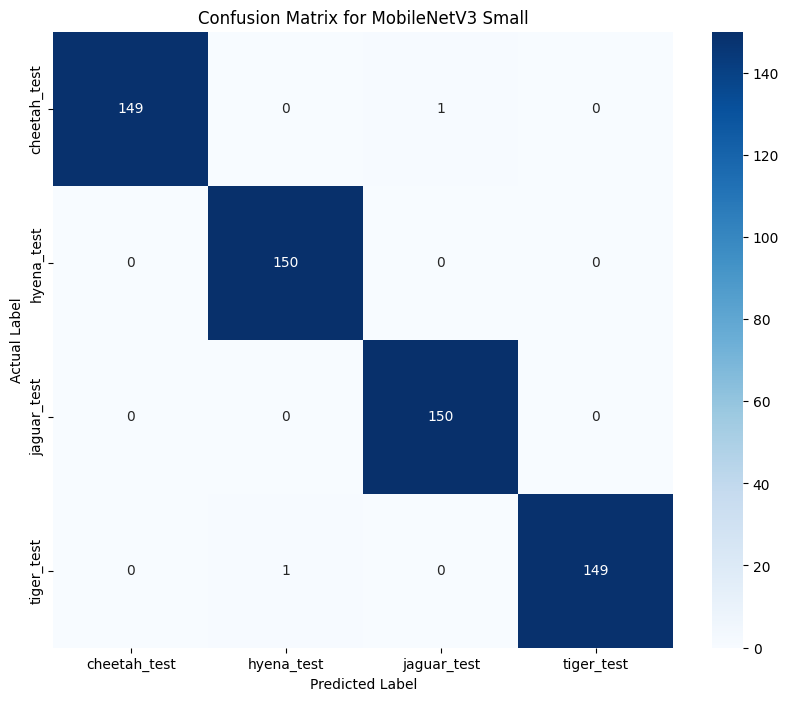

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      1.00       150
  hyena_test       0.99      1.00      1.00       150
 jaguar_test       0.99      1.00      1.00       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



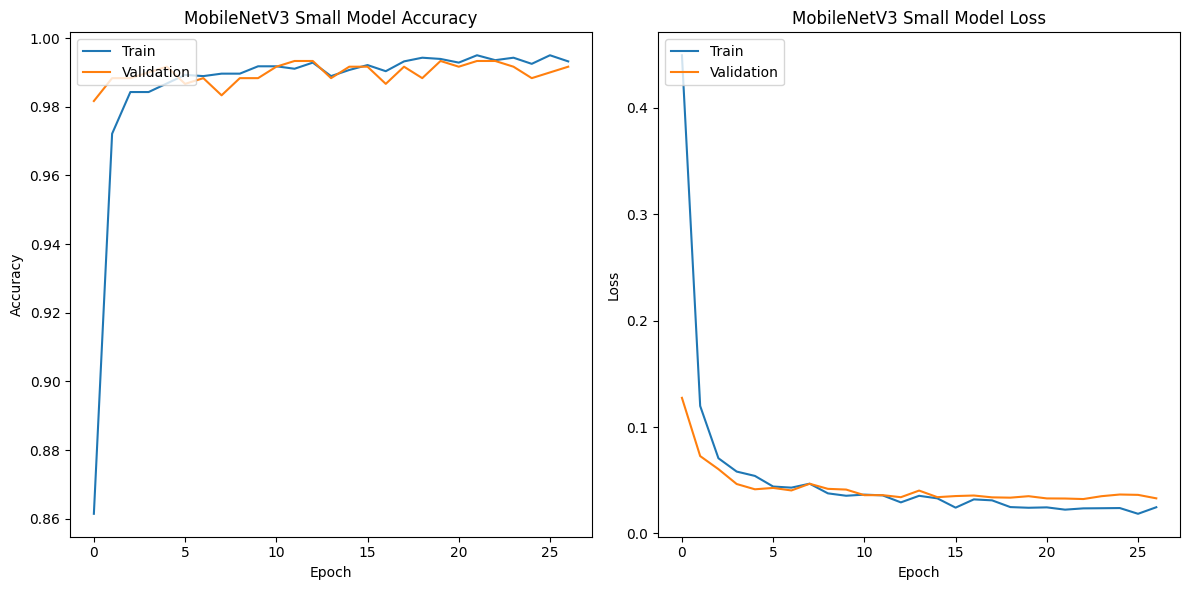

In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 16  # Reduced batch size for better gradient updates

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,  # Reduced rotation
    width_shift_range=0.15,  # Reduced shift
    height_shift_range=0.15,  # Reduced shift
    shear_range=0.15,  # Reduced shear
    zoom_range=0.15,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Reduced from 1024 to 512
x = Dropout(0.3)(x)  # Reduced dropout from 0.5 to 0.3
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)  # Increased patience

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
175/175 [==============================] - ETA: 0s - loss: 0.1579 - accuracy: 0.9575   
Epoch 1: val_accuracy improved from -inf to 0.99500, saving model to best_mobilenetv3_large_model.h5
175/175 [==============================] - 57s 306ms/step - loss: 0.1579 - accuracy: 0.9575 - val_loss: 0.0274 - val_accuracy: 0.9950 - lr: 1.0000e-04
Epoch 2/50
175/175 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9925  
Epoch 2: val_accuracy did not improve from 0.99500
175/175 [==============================] - 40s 229ms/step - loss: 0.0366 - accuracy: 0.9925 - val_loss: 0.0240 - val_accuracy: 0.9950 - lr: 1.0000e-04
Epoch 3/50
175/175 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9932 
Epoch 3: val_accuracy did not improve from 0.99500
175/175 [==============================] - 34s 193ms/step - loss: 0.0291 - ac

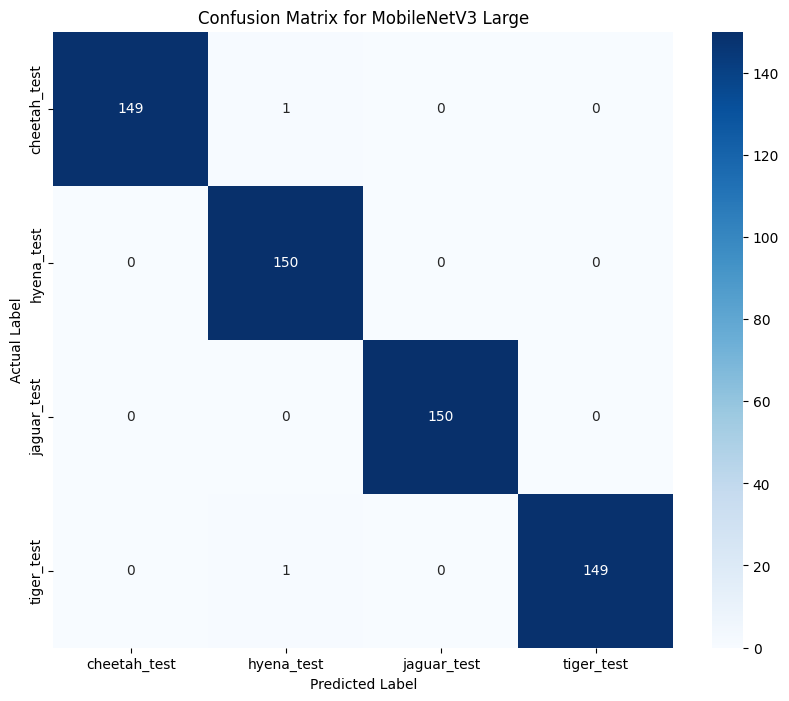

Classification Report for MobileNetV3 Large
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      1.00       150
  hyena_test       0.99      1.00      0.99       150
 jaguar_test       1.00      1.00      1.00       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



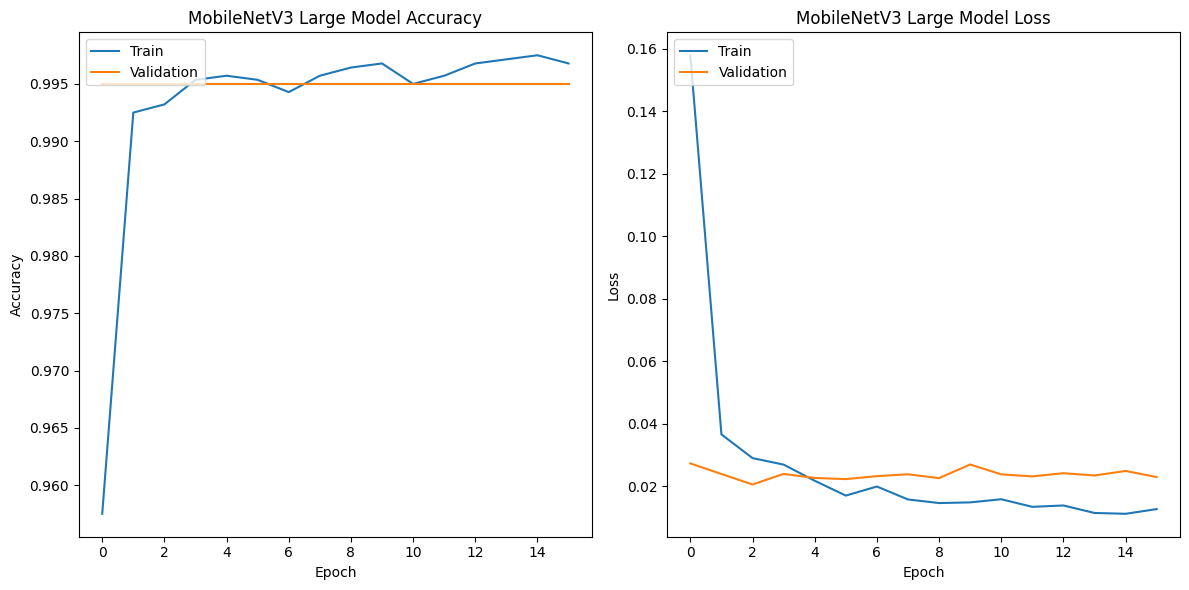

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
import time

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 16  # Reduced batch size for better gradient updates

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,  # Reduced rotation
    width_shift_range=0.15,  # Reduced shift
    height_shift_range=0.15,  # Reduced shift
    shear_range=0.15,  # Reduced shear
    zoom_range=0.15,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Large model
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Reduced from 1024 to 512
x = Dropout(0.3)(x)  # Reduced dropout from 0.5 to 0.3
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_large_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)  # Increased patience

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_large_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Large')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Large')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Large Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Large Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/30
88/88 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.8961  
Epoch 1: val_accuracy improved from -inf to 0.98833, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 48s 498ms/step - loss: 0.2672 - accuracy: 0.8961 - val_loss: 0.0497 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 2/30
88/88 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9743 
Epoch 2: val_accuracy did not improve from 0.98833
88/88 [==============================] - 38s 437ms/step - loss: 0.0796 - accuracy: 0.9743 - val_loss: 0.0522 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 3/30
88/88 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9879 
Epoch 3: val_accuracy did not improve from 0.98833
88/88 [==============================] - 37s 418ms/step - loss: 0.0525 - accuracy: 0.9879 - val_l

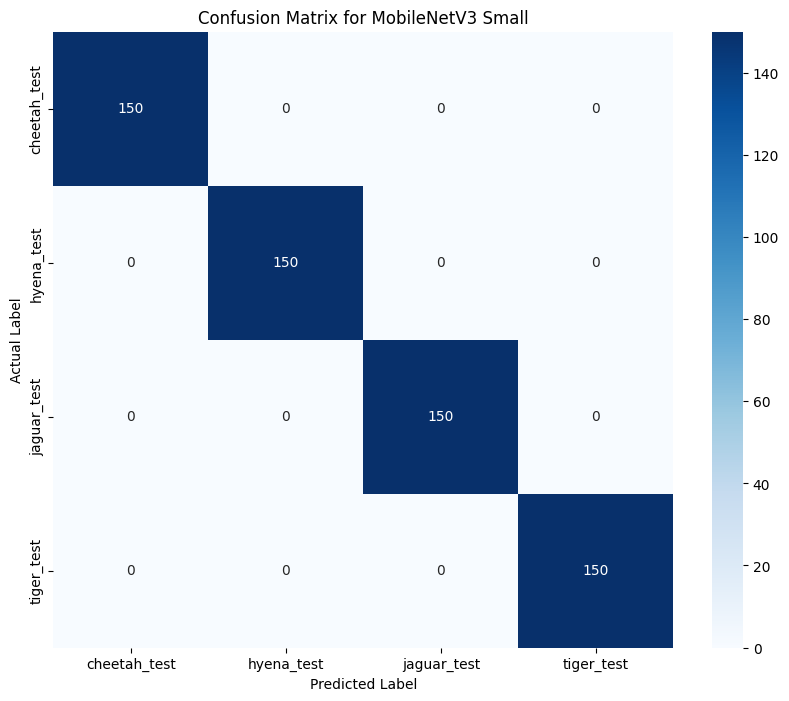

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      1.00      1.00       150
  hyena_test       1.00      1.00      1.00       150
 jaguar_test       1.00      1.00      1.00       150
  tiger_test       1.00      1.00      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



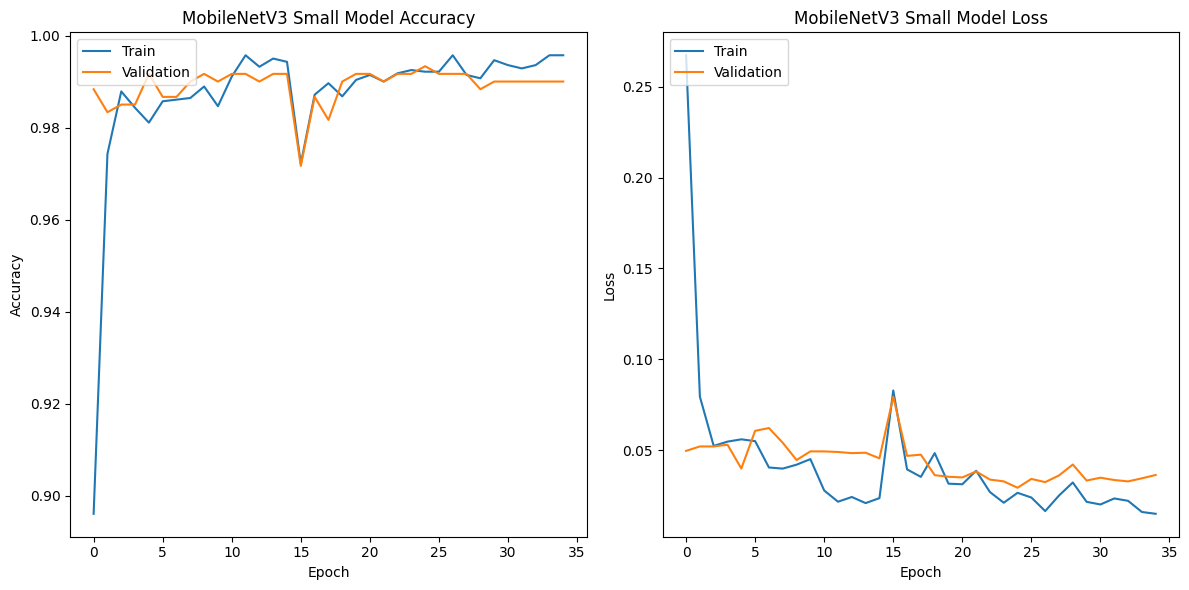

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
import time


# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32  # Increased batch size for more stable gradients

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with moderate augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,  # Moderate rotation
    width_shift_range=0.1,  # Reduced shift
    height_shift_range=0.1,  # Reduced shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Reduced complexity
x = Dropout(0.4)(x)  # Increased dropout for better regularization
x = Dense(128, activation='relu')(x)  # Additional layer for better feature learning
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with appropriate learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks with better parameters
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, min_delta=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6, verbose=1)

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Reduced epochs for better convergence
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Fine-tuning phase
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Combine training histories
for key in history.history.keys():
    history.history[key].extend(history_finetune.history[key])

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 1.0282 - accuracy: 0.5750  
Epoch 1: val_accuracy improved from -inf to 0.99500, saving model to best_mobilenetv3_large_model.h5
88/88 [==============================] - 67s 703ms/step - loss: 1.0282 - accuracy: 0.5750 - val_loss: 0.2047 - val_accuracy: 0.9950 - lr: 5.0000e-05
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.3803 - accuracy: 0.8850  
Epoch 2: val_accuracy improved from 0.99500 to 0.99667, saving model to best_mobilenetv3_large_model.h5
88/88 [==============================] - 55s 629ms/step - loss: 0.3803 - accuracy: 0.8850 - val_loss: 0.0330 - val_accuracy: 0.9967 - lr: 5.0000e-05
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9561  
Epoch 3: val_accuracy did not improve from 0.99667
88/88 [===========================

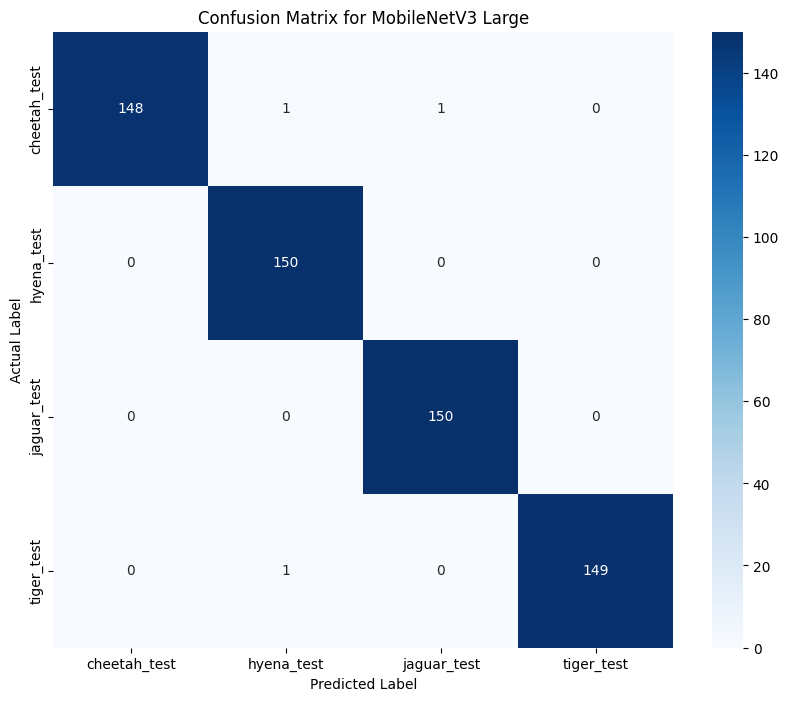

Classification Report for MobileNetV3 Large
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      0.99       150
  hyena_test       0.99      1.00      0.99       150
 jaguar_test       0.99      1.00      1.00       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           0.99       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      0.99      0.99       600



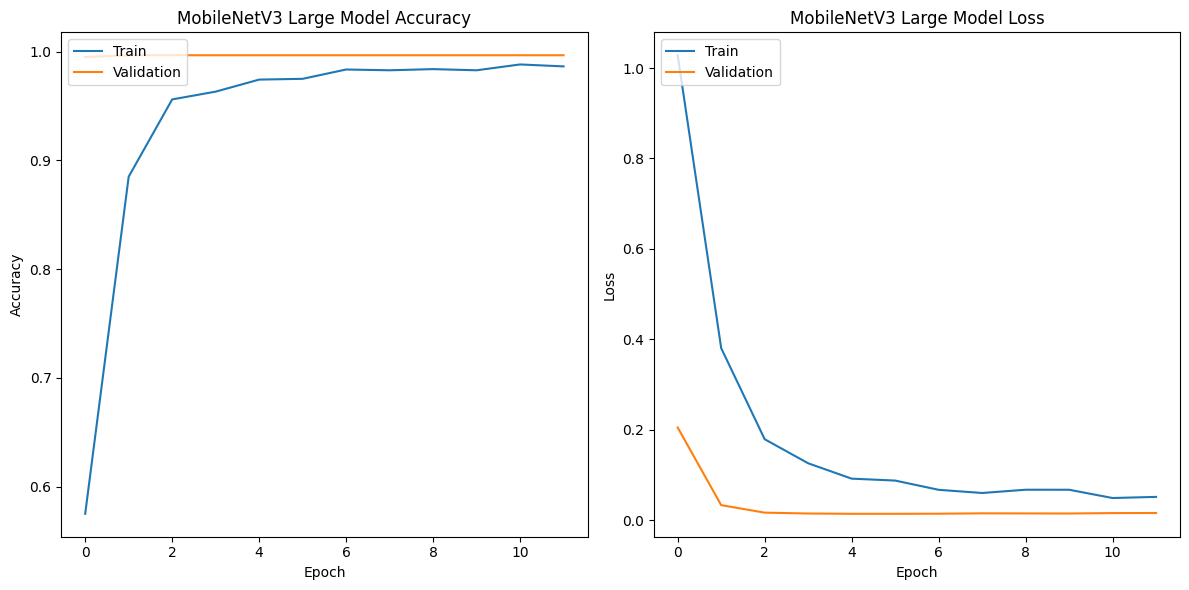

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
import time

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32  # Increased batch size for more stable gradients

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with stronger augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,  # Increased rotation
    width_shift_range=0.2,  # Increased shift
    height_shift_range=0.2,  # Increased shift
    shear_range=0.2,  # Increased shear
    zoom_range=0.2,  # Increased zoom
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Added brightness variation
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Large model
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers with more regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Reduced from 512 to 256
x = Dropout(0.5)(x)  # Increased dropout from 0.3 to 0.5
x = Dense(128, activation='relu')(x)  # Added another layer
x = Dropout(0.4)(x)  # Additional dropout
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze most layers but unfreeze last few layers for fine-tuning
for layer in base_model.layers[:-20]:  # Freeze all but last 20 layers
    layer.trainable = False
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers
    layer.trainable = True

# Compile the model with even lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks with adjusted parameters
checkpoint = ModelCheckpoint('best_mobilenetv3_large_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)  # Reduced patience

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-8, verbose=1)  # More aggressive LR reduction

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)
end_time = time.time()
training_time = end_time - start_time


# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_large_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")
print(f"Training completed in: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Large')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Large')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Large Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Large Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/40
175/175 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.7300   
Epoch 1: val_accuracy improved from -inf to 0.98500, saving model to best_mobilenetv3_small_model.h5
175/175 [==============================] - 42s 218ms/step - loss: 0.6809 - accuracy: 0.7300 - val_loss: 0.1080 - val_accuracy: 0.9850 - lr: 5.0000e-04
Epoch 2/40
175/175 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9225  
Epoch 2: val_accuracy improved from 0.98500 to 0.99000, saving model to best_mobilenetv3_small_model.h5
175/175 [==============================] - 38s 219ms/step - loss: 0.2311 - accuracy: 0.9225 - val_loss: 0.0555 - val_accuracy: 0.9900 - lr: 5.0000e-04
Epoch 3/40
175/175 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9514 
Epoch 3: val_accuracy did not improve from 0.99000
175/175 [===============

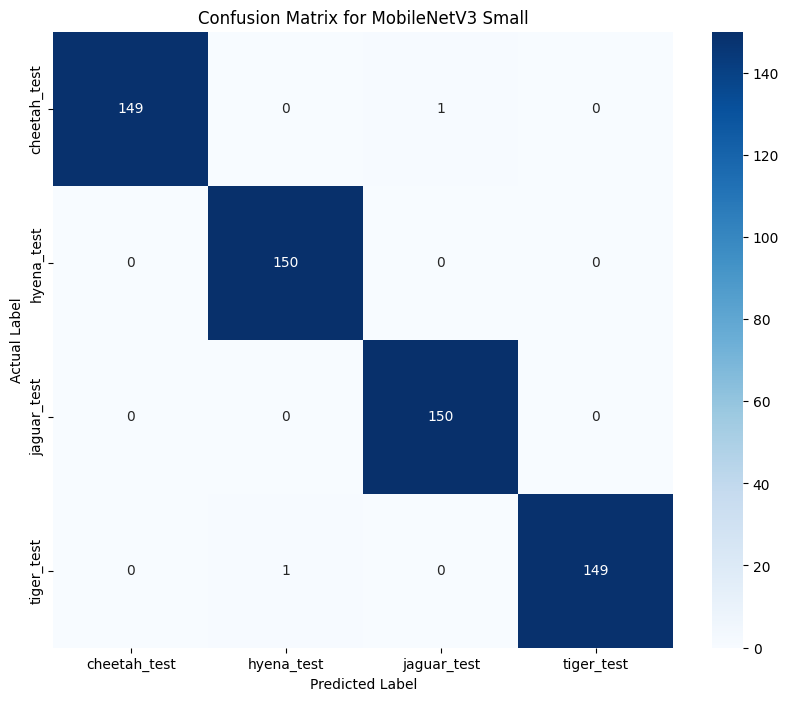

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      1.00       150
  hyena_test       0.99      1.00      1.00       150
 jaguar_test       0.99      1.00      1.00       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



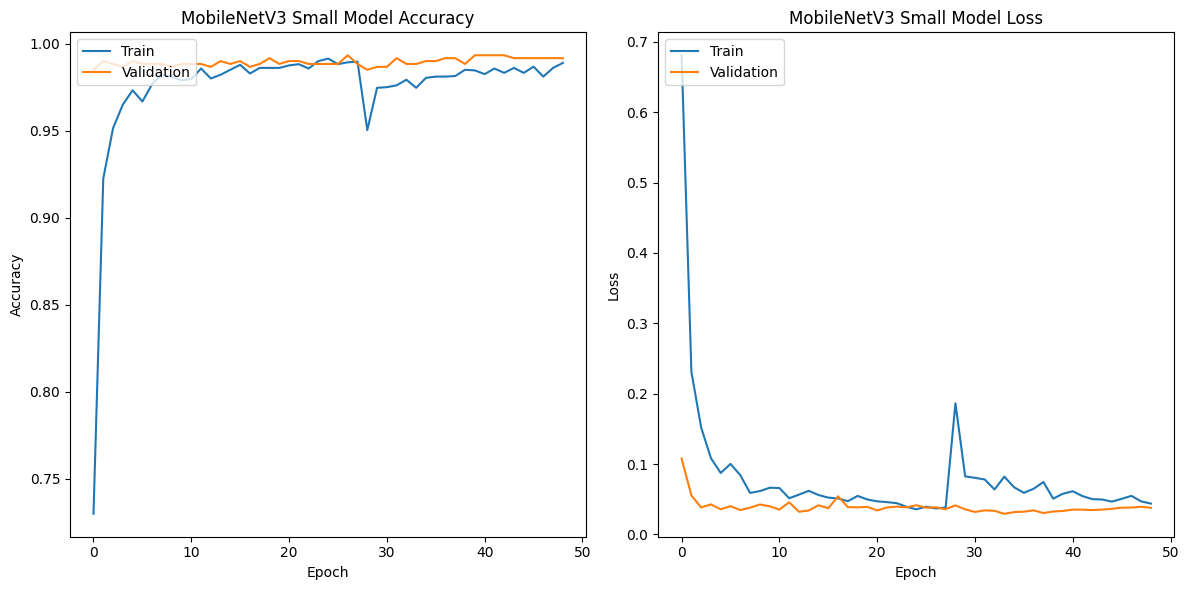

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
import time


# Define image dimensions
img_height, img_width = 224, 224
batch_size = 16  # Reduced batch size for more stable gradients

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with stronger augmentation for better generalization
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers with stronger regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Reduced complexity
x = Dropout(0.5)(x)  # Increased dropout
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks with more conservative parameters
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, min_delta=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7, verbose=1)

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)
end_time = time.time()
training_time = end_time - start_time


# Fine-tuning phase
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-15:]:  # Reduced number of layers to unfreeze
    layer.trainable = True

# Recompile with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Combine training histories
for key in history.history.keys():
    history.history[key].extend(history_finetune.history[key])

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")
print(f"Training completed in: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()